# Affinity Propagation


In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

from sklearn.preprocessing import LabelEncoder
from sklearn.cluster import AffinityPropagation

In [3]:
iris = sns.load_dataset('iris')
print(iris.head())
iris.describe()

   sepal_length  sepal_width  petal_length  petal_width species
0           5.1          3.5           1.4          0.2  setosa
1           4.9          3.0           1.4          0.2  setosa
2           4.7          3.2           1.3          0.2  setosa
3           4.6          3.1           1.5          0.2  setosa
4           5.0          3.6           1.4          0.2  setosa


,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


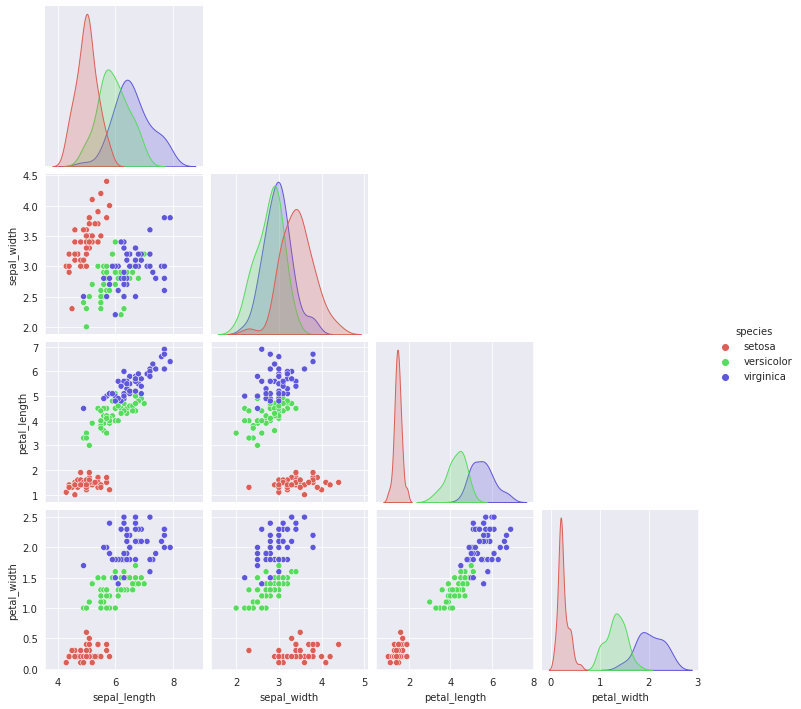

In [4]:
palette = sns.color_palette("hls", 3)
sns.pairplot(iris, hue='species', palette=palette, corner=True)

In [16]:
X = iris.drop('species', axis=1)
enc = LabelEncoder().fit(iris.species)
y = enc.transform(iris.species)
ap = AffinityPropagation(random_state=42).fit(X, y)

In [19]:
from sklearn import metrics

def print_infos(cl, X, y_true):
    n_clusters_ = len(cl.cluster_centers_indices_)

    print("Estimated number of clusters: %d" % n_clusters_)
    print("Homogeneity: %0.3f" % metrics.homogeneity_score(y_true, cl.labels_))
    print("Completeness: %0.3f" % metrics.completeness_score(y_true, cl.labels_))
    print("V-measure: %0.3f" % metrics.v_measure_score(y_true, cl.labels_))
    print("Adjusted Rand Index: %0.3f" % metrics.adjusted_rand_score(y_true, cl.labels_))
    print("Adjusted Mutual Information: %0.3f" % metrics.adjusted_mutual_info_score(y_true, cl.labels_))
    print("Silhouette Coefficient: %0.3f" % metrics.silhouette_score(X, cl.labels_, metric="sqeuclidean"))

print_infos(ap, X, y)

Estimated number of clusters: 7
Homogeneity: 0.915
Completeness: 0.528
V-measure: 0.669
Adjusted Rand Index: 0.481
Adjusted Mutual Information: 0.660
Silhouette Coefficient: 0.525


## Interpretation
Compared to kmeans, affinity propagation creates more, smaller clusters. This means it can better approximate the different classes (Homogenity) but each cluster doesn't 1:1 represent a class (Completeness) but rather multiple clusters come together for a single class.

The different clusters may be very close together (since they share the class to predict; Silhouette Coefficient)

In [9]:
close_data = pd.DataFrame(data={ 'sepal_length': [4.95], 'sepal_width': [3.0], 'petal_length': [1.4], 'petal_width': [0.2], 'species': ['setosa'] })

In [20]:
X_valid = close_data.drop('species', axis=1)

# Predicts the cluster, not the class (Maybe the same but most likely isn't)
ap.predict(X_valid)

array([0])